In [129]:
#Import modules for analysis

import numpy as np
import pandas as pd 
import math 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.spatial 
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [130]:
data = pd.read_csv('data.csv')

Exploratory Data Analysis

In [131]:
#Printing Dataset Dimensions
print(data.shape)

(569, 33)


In [132]:
#Print the first 5 rows of the dataset
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [133]:
#Inspect data types
print(data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [134]:
#Check for missing values
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [135]:
#Types of Cancer: Malignant and Benign
print(data["diagnosis"].unique())

['M' 'B']


In [136]:
# Calculating the proportions of cases we have in each cancer type
print(data["diagnosis"].value_counts()/data.shape[0])

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


Data Cleaning

In [137]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [138]:
#Dropping the ID and Unnamed: 32 columns as they are not needed for analysis

data.drop (['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [139]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [140]:
#Encoding the diagnosis column to 0 and 1 where 1 is Malignant and 0 is Benign
if data.diagnosis[0]=="M" or data.diagnosis[0]=="B":
    data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [141]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot: xlabel='area_mean', ylabel='smoothness_mean'>

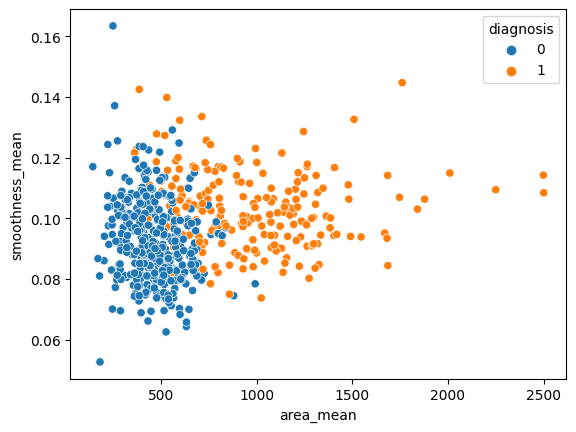

In [142]:
#Plotting the distribution of the diagnosis column to see the proportion of Malignant and Benign cases
sns.scatterplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=data)

In [143]:
y = data.diagnosis.values
x_data = data.drop(["diagnosis"], axis=1)

Normalising the Data

In [144]:
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [146]:
#Import plotting modules
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.offline as py
from plotly.graph_objs import Scatter, Layout 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [147]:
p = data.describe().T 
p = p.round(4) 
table = go.Table(
    columnwidth=[0.8]+[0.5]*8, 
    header=dict(
        values=['Attribute'] + list(p.columns), line = dict(color='#506784'),
        fill = dict(color='lightblue'),
), 
    cells=dict(
        values=[p.index] + [p[k].tolist() for k in p.columns[:]], line = dict(color='#506784'),
        fill = dict(color=['rgb(173, 216, 220)', '#f5f5fa'])
) )
py.iplot([table], filename='Table-of-mining-data')

B    357
M    212
Name: diagnosis, dtype: int64


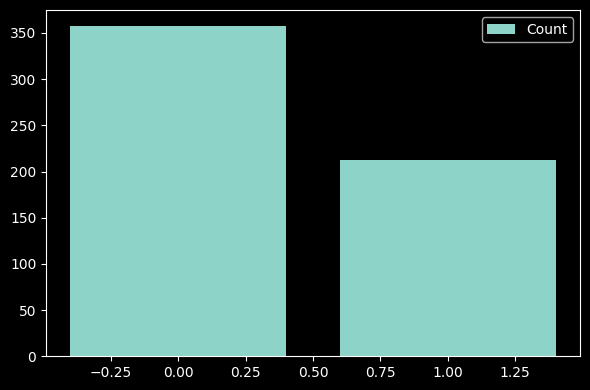

In [148]:
B, M = data['diagnosis'].value_counts()
s = [B,M] 
print(df['diagnosis'].value_counts())
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar([0,1], s,align ='center', label ='Count')
    plt.ylabel('') 
    plt.xlabel('') 
    plt.legend(loc ='best') 
    plt.tight_layout()

In [149]:
B, M = data['diagnosis'].value_counts()
trace1 = go.Bar(y = (M, B), x = ['malignant', 'benign'],opacity = 0.8)
trace2 = go.Pie(labels = ['Benign','Malignant'], values = data['diagnosis'].value_counts(), textfont=dict(size=15), opacity = 0.8)
py.iplot([trace2])

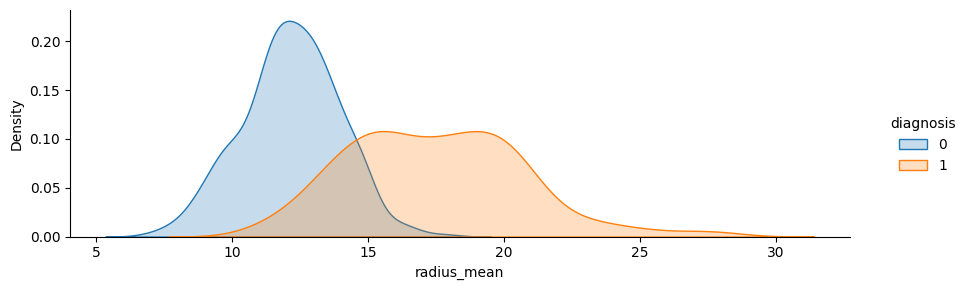

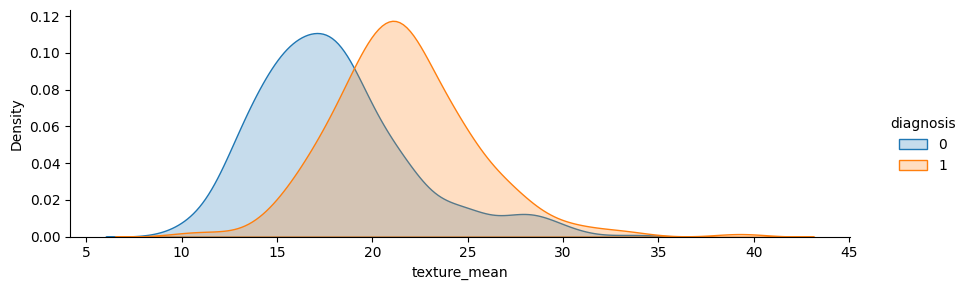

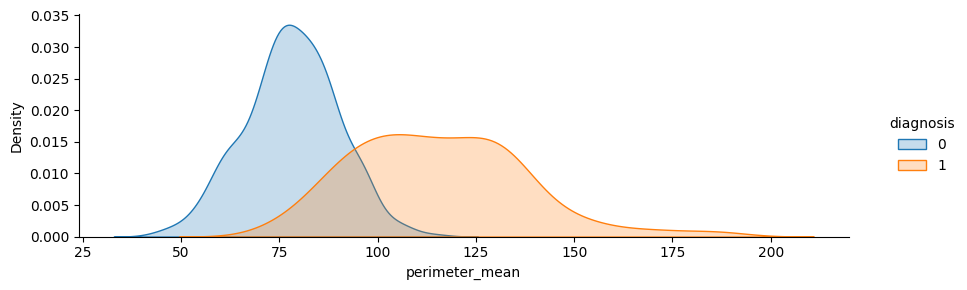

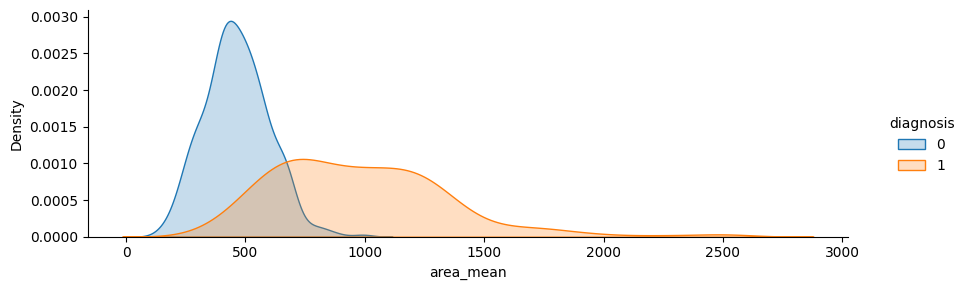

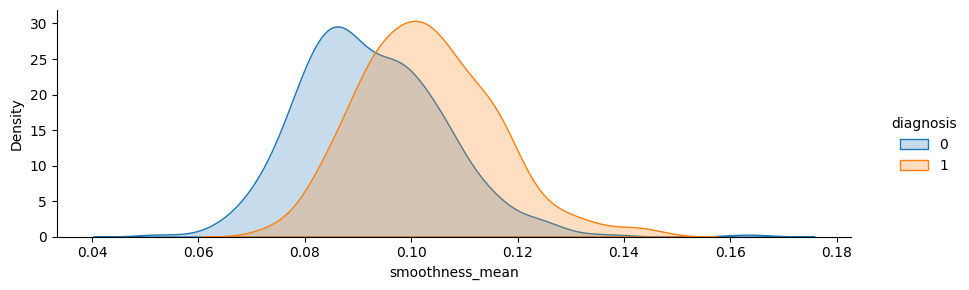

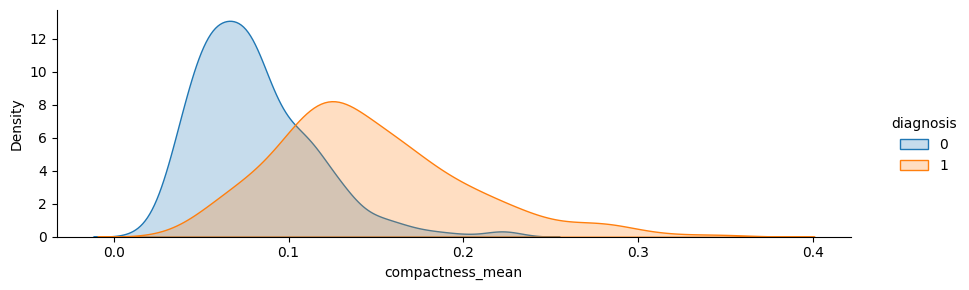

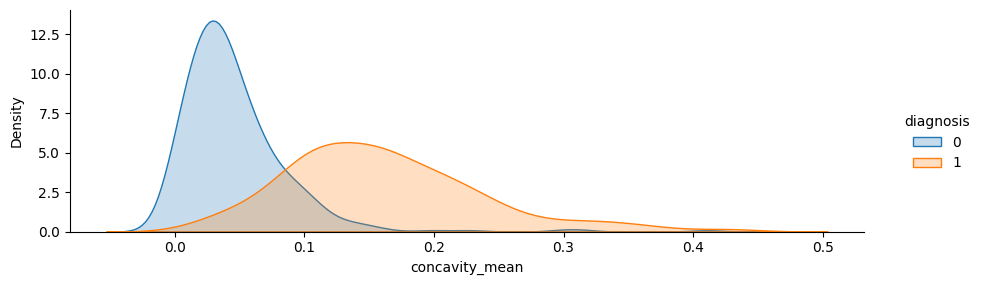

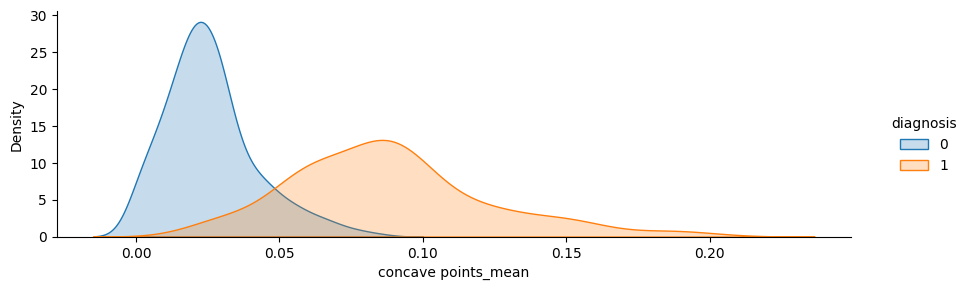

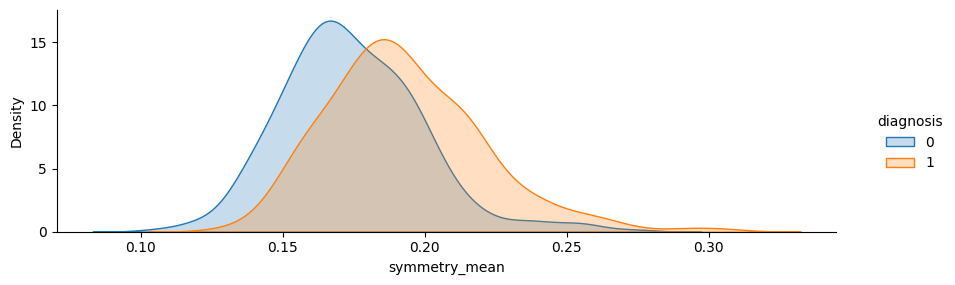

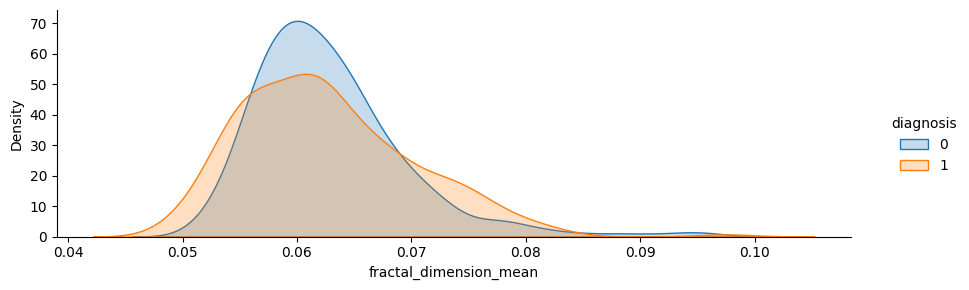

In [150]:
mean_col = [col for col in df.columns if col.endswith('_mean')] 
for i in range(len(mean_col)):
    sns.FacetGrid(data,hue="diagnosis",aspect=3,margin_titles=True).map(sns.kdeplot,mean_col[i],shade= True).add_legend() 

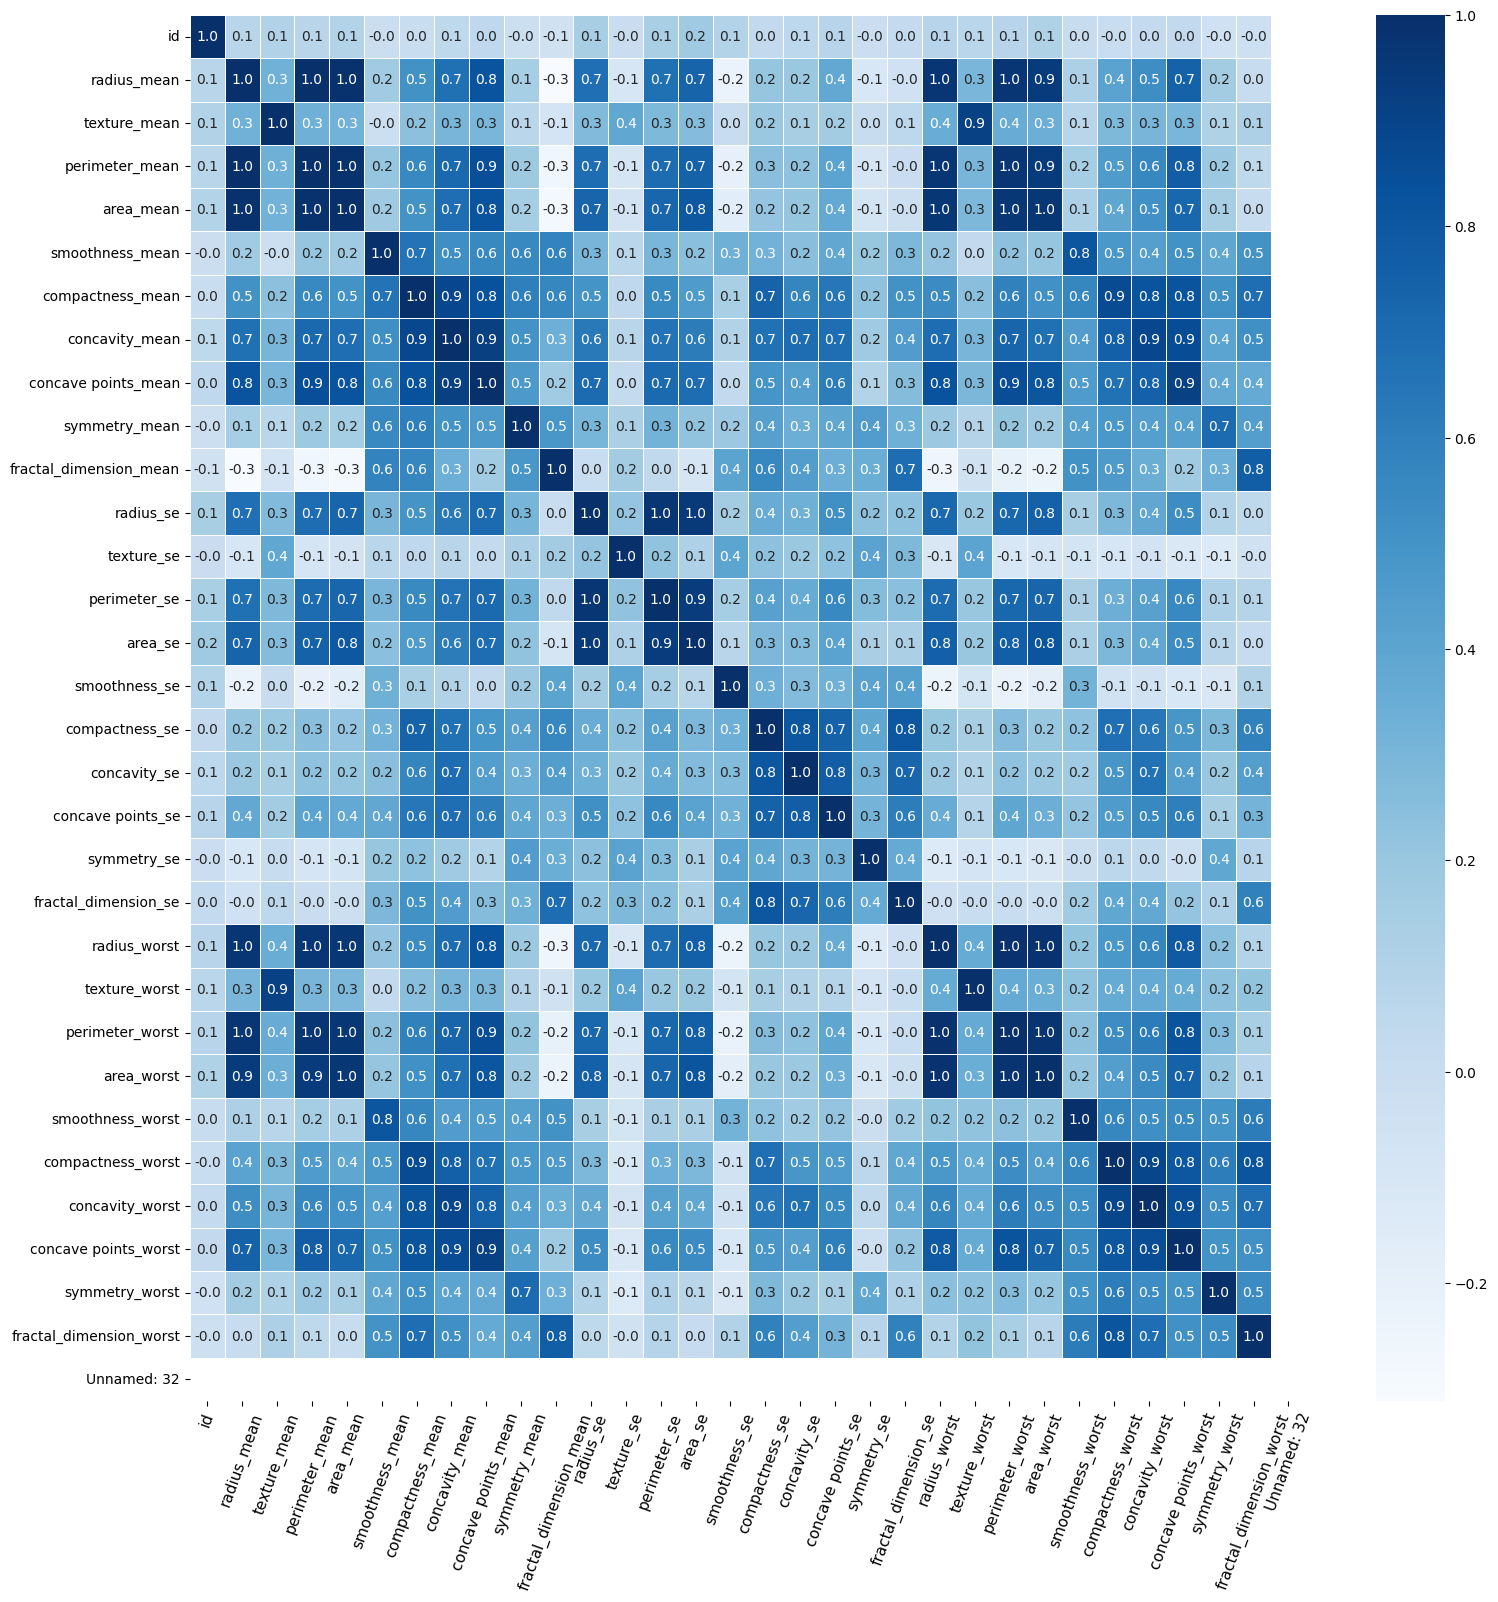

In [151]:
#Correlation Map
f,ax = plt.subplots(figsize=(18, 18))
cmap = sns.diverging_palette( 240 , 10 , as_cmap = True ) 
sns.heatmap(df.corr(), cmap='Blues',annot=True, linewidths=.5, fmt= '.1f',ax=ax) 
plt.xticks(fontsize=11,rotation=70)
plt.show()